In [53]:
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors   # import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.inspection import plot_partial_dependence

In [49]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})
%matplotlib inline

In [2]:
def acc(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp+tn)/(tn+fn+fp+tp)
    return accuracy

In [3]:
def prec(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp/(tp+fp)
    return precision

In [4]:
def recall(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall = tp/(tp+fn)
    return recall

In [5]:
acc_score = make_scorer(acc)
prec_score = make_scorer(prec)
recall_score = make_scorer(recall)

In [6]:
data = pd.read_csv("../data/clean_train.csv", index_col="Unnamed: 0")
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,0,0,0.0,0,False,100.0,False
1,8.06,5.0,5.0,1.00,0,0,0.0,2,True,0.0,False
2,21.50,4.0,0.0,1.00,1,1,0.0,1,True,100.0,False
3,9.46,5.0,0.0,2.75,1,0,100.0,1,False,100.0,False
4,13.77,5.0,0.0,1.00,1,1,0.0,0,False,100.0,False


In [7]:
y = data.pop("churn").values

In [46]:
cols_X = data.columns.tolist()

In [8]:
X = data.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
rf = RandomForestClassifier(oob_score=True)

In [11]:
rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
out_of_box_pred = rf.predict(X_test)

In [13]:
rf.score(X_test, y_test)

0.7534

In [14]:
param_grid = {"criterion" : ['gini', 'entropy'],
              "max_depth" : [None], 
              "max_features" : ['auto', 'sqrt', 'log2'], 
              "min_samples_leaf" : [1, 2, 3, 4, 5], 
              "min_samples_split" : [2, 4, 6, 8, 10],
              "n_estimators" : [50], 
              "n_jobs" : [-1],
              "oob_score" : [True]}

In [15]:
rf = RandomForestClassifier()

In [16]:
rf_grid = GridSearchCV(rf, param_grid, scoring=acc_score, n_jobs=6, cv=5, verbose=1)

In [17]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    7.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.2min
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=6)]: Done 750 out of 750 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              warm_start=False),
             iid='warn', n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],

In [18]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': True}

In [19]:
rf_grid.best_score_

0.7836

In [20]:
best_rf = rf_grid.best_estimator_

In [21]:
feature_importances = best_rf.feature_importances_

In [22]:
len(feature_importances)

10

In [39]:
plot_partial_dependence?

In [38]:
plot_partial_dependence(best_rf, X_train, range(10), fig=fig)

Feature ranking:
1. feature 1 (0.155413)
2. feature 0 (0.143407)
3. feature 9 (0.126827)
4. feature 4 (0.122804)
5. feature 6 (0.114702)
6. feature 3 (0.094665)
7. feature 7 (0.071273)
8. feature 5 (0.061241)
9. feature 2 (0.057617)
10. feature 8 (0.052050)


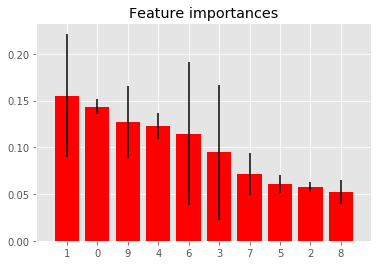

In [58]:
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
             axis=0)
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.savefig("../img/random_forest_feature_importance.png")
plt.show()

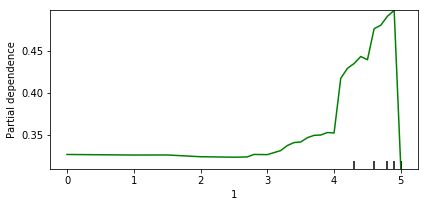

In [42]:
plot_partial_dependence(best_rf, X_train, [1])

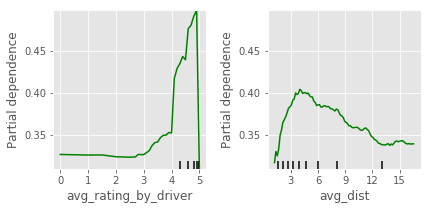

In [54]:
plot_partial_dependence(best_rf, X_train, features=[1, 0], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_top2_partial_dependencies.png")

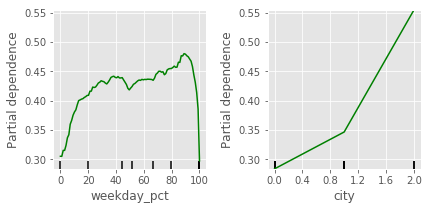

In [55]:
plot_partial_dependence(best_rf, X_train, features=[9, 4], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_3_4_partial_dependencies.png")

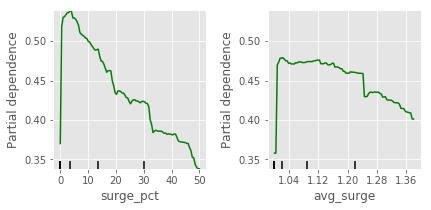

In [56]:
plot_partial_dependence(best_rf, X_train, features=[6, 3], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_5_6_partial_dependencies.png")